In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import data
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/'
df = pd.read_excel(path + 'Final_projectML_churn_prediction.xlsx')
df.head()

Mounted at /content/drive


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


##**Question 1: What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.**

##**Step 1: Data Cleaning**

### Data Overview:

In [ ]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07


In [ ]:
df.shape

(5630, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Summary:
*   No abnormal data
*   Have missing data


### Handle missing values

In [ ]:
# Check % missing values
missing_row_percentage = df.isnull().any(axis=1).mean()*100
print(missing_row_percentage)

32.96625222024866


In [ ]:
# Check columns having missing values
missing_col=df.isnull().sum()
missing_col = missing_col[missing_col>0]
missing_col

,0
Tenure,264
WarehouseToHome,251
HourSpendOnApp,255
OrderAmountHikeFromlastYear,265
CouponUsed,256
OrderCount,258
DaySinceLastOrder,307


In [ ]:
# Because % mising values > 20% and disperse in many columns --> using ML model to impute missing value
# Data type of missing columns is float --> imputer mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[missing_col.index] = imputer.fit_transform(df[missing_col.index])
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [ ]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.000000,4.543491,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,3.008004,9.000000,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.000000,7.000000,174.07


### Handle duplicate values

In [ ]:
# Check duplicate

duplicate_count = df.duplicated('CustomerID').sum()
print(duplicate_count)

0


In [ ]:
# Drop Customer ID column

df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.000000,4.543491,229.53
1,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,3.008004,9.000000,234.38
2,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.000000,7.000000,174.07
3,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.000000,9.000000,231.48
4,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.000000,8.000000,165.14


### Heatmap correlation

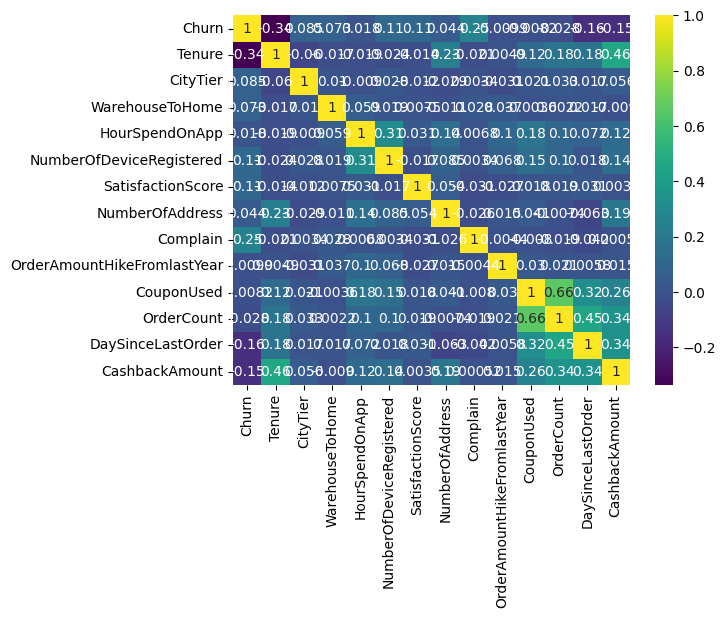

In [ ]:
dataplot = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")



Summary: According to the heatmap, churn rate is strongly collerated with some numerical features like tenure, complain, daysinceLastOrder and CashbackAmount.

##**Step 2: Feature engineering**

### Encoding

In [ ]:
# Count unique value for categorical columns
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols:
    print(f"{col}:{df[col].nunique()}")

PreferredLoginDevice:3
PreferredPaymentMode:7
Gender:2
PreferedOrderCat:6
MaritalStatus:3


In [ ]:
# Encoding columns:
col_encoding=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
df_encoding = pd.get_dummies(df, columns= col_encoding,drop_first=True)
df_encoding.head()



,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,20.0,3,7.0,4.0,4,5,3,0,26.0,...,True,False,False,False,False,False,False,False,True,False
1,0,13.0,1,9.0,4.0,4,3,2,0,26.0,...,False,False,False,False,False,False,False,False,False,True
2,0,16.0,3,7.0,3.0,4,3,3,0,26.0,...,False,False,True,False,True,False,False,False,False,False
3,0,5.0,1,16.0,3.0,4,4,3,0,26.0,...,False,False,True,False,False,False,False,False,True,False
4,0,9.0,1,28.0,3.0,4,2,3,1,26.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
#Convert all columns' datatype to int
df_encoding = df_encoding.astype(int)
df_encoding.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,20,3,7,4,4,5,3,0,26,...,1,0,0,0,0,0,0,0,1,0
1,0,13,1,9,4,4,3,2,0,26,...,0,0,0,0,0,0,0,0,0,1
2,0,16,3,7,3,4,3,3,0,26,...,0,0,1,0,1,0,0,0,0,0
3,0,5,1,16,3,4,4,3,0,26,...,0,0,1,0,0,0,0,0,1,0
4,0,9,1,28,3,4,2,3,1,26,...,0,0,0,0,1,0,0,0,0,0


### Split dataset

In [ ]:
from sklearn.model_selection import train_test_split


X = df_encoding.drop('Churn', axis=1)
y = df_encoding['Churn']

# Split data
X_train, X_tem, y_train, y_tem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tem, y_tem, test_size=0.5, random_state=42)
print(f"Number data of train set: {len(X_train)}")
print(f"Number data of validate set: {len(X_val)}")
print(f"Number data of test set: {len(X_test)}")



Number data of train set: 3941
Number data of validate set: 844
Number data of test set: 845


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Find out feature importance

In [ ]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier(random_state=42, n_estimators = 100)
rd.fit(X_train_scaled, y_train)

y_rd_pred = rd.predict(X_val_scaled) #model to predict
y_rd_pred_train = rd.predict(X_train_scaled) #Predict back on train to check overfit
y_rd_pred_val = rd.predict(X_val_scaled)  ##Predict on validate dataset

In [ ]:
# Get feature importance
importances = rd.feature_importances_


# Display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df)

                                  Feature  Importance
0                                  Tenure    0.206592
12                         CashbackAmount    0.087890
2                         WarehouseToHome    0.071431
7                                Complain    0.066753
11                      DaySinceLastOrder    0.066276
6                         NumberOfAddress    0.062979
8             OrderAmountHikeFromlastYear    0.057201
5                       SatisfactionScore    0.047765
4                NumberOfDeviceRegistered    0.036708
10                             OrderCount    0.034248
9                              CouponUsed    0.029575
28                   MaritalStatus_Single    0.026223
1                                CityTier    0.026041
3                          HourSpendOnApp    0.018819
23    PreferedOrderCat_Laptop & Accessory    0.018174
21                            Gender_Male    0.017445
13      PreferredLoginDevice_Mobile Phone    0.016331
18        PreferredPaymentMo

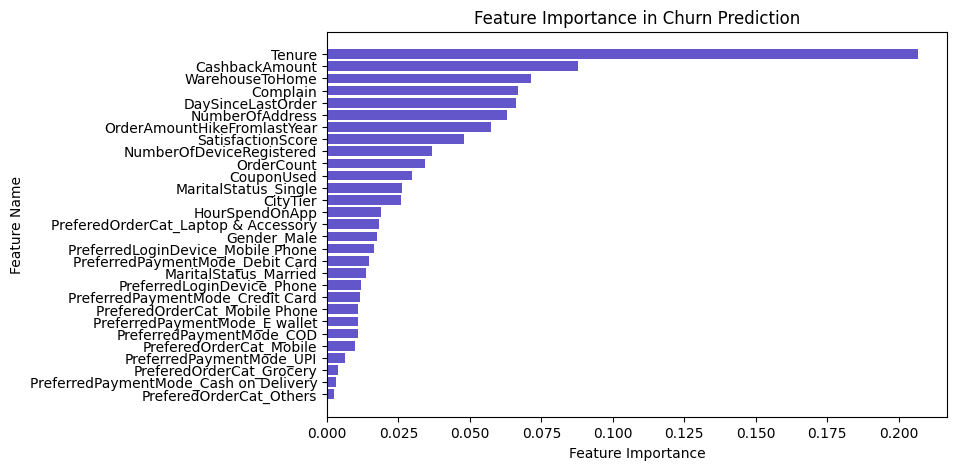

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#6256CA')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Churn Prediction')
plt.gca().invert_yaxis()
plt.show()

Summary: the figure shows that Tenure, CashbackAmount, WarehousetoHome, Complain, DaysinceLastOrder have a strong impact on churn.

### Explain the Impact of Feature importance

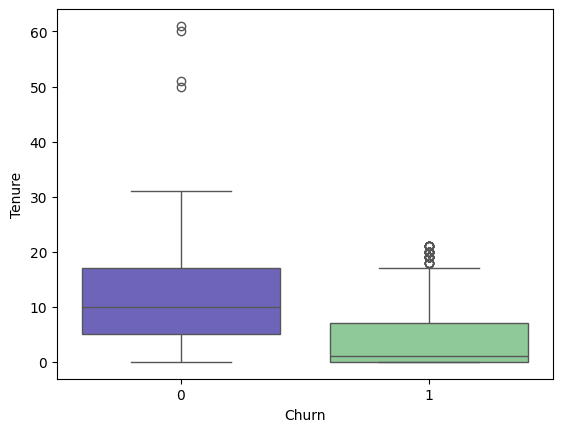

In [ ]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='Tenure', data=df_encoding,palette= {'0': '#6256CA', '1': '#86D293'})
plt.show()

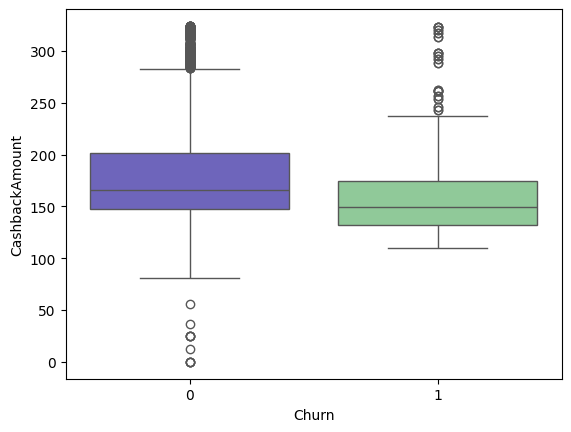

In [ ]:
# Cash back amount vs Churn
sns.boxplot(x='Churn', y='CashbackAmount', data=df_encoding, palette= {'0': '#6256CA', '1': '#86D293'})
plt.show()

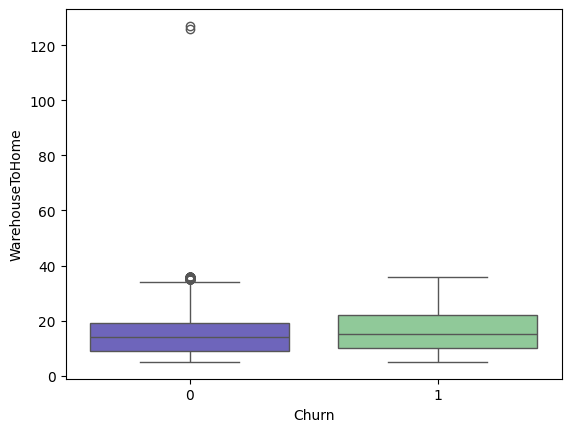

In [ ]:
# Warehouse to Home vs Churn
sns.boxplot(x='Churn', y='WarehouseToHome', data=df_encoding, palette= {'0': '#6256CA', '1': '#86D293'})
plt.show()

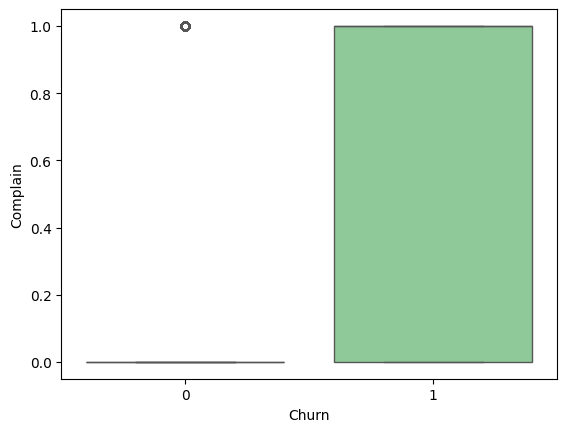

In [ ]:
# Complain vs Churn
sns.boxplot(x='Churn', y='Complain', data=df_encoding,palette= {'0': '#6256CA', '1': '#86D293'})
plt.show()

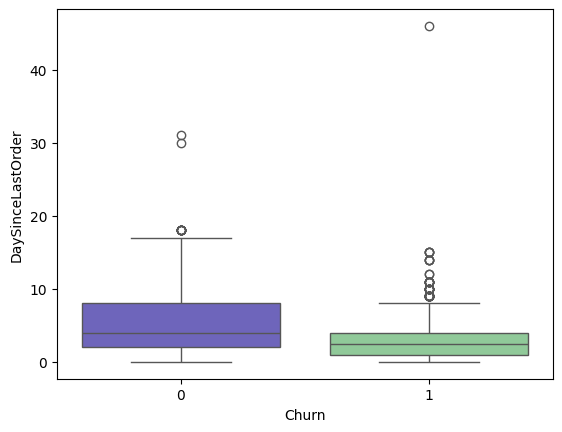

In [ ]:
# Day since last order vs Churn
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df_encoding,palette= {'0': '#6256CA', '1': '#86D293'})
plt.show()

**Insights:**
*   New customers -->  More likely to churn
*   Lower cash back amount --> More likely to churn
*   Higher distance from warehouse to home --> More likely to churn
*   High Complain -->  More likely to churn

**Recommendations:**

*   For new custotmers: Offer appealling discount or loyalty points  and implement onboarding programs to improve customers' engagement
*   For high tenure customers: Provide exclusive loyalty perks .
*   For low cash back customers: introduce a tiered loyalty program (higher spending = more cashback).
*   Distance: Offer free/discounted delivery for high-risk customers; Optimize fulfillment centers.
*   Fast response to customers' complain, offer compensation for severe issue.









##**Question 2: Build the Machine Learning model for predicting churned users. (fine tuning)**

### Apply model

In [ ]:
#knn model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train) #model to learn
y_knn_pred_val = knn.predict(X_val_scaled) #Predict on validate dataset
y_knn_pred_train = knn.predict(X_train_scaled) #Predict back on train to check overfit


In [ ]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train) #model to learn
y_lr_pred_val = lr.predict(X_val_scaled) #Predict on validate dataset
y_lr_pred_train = lr.predict(X_train_scaled) #Predict back on train to check overfit

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier(random_state=42, n_estimators = 100)
rd.fit(X_train_scaled, y_train)

y_rd_pred_val = rd.predict(X_val_scaled)  ##Predict on validate dataset
y_rd_pred_train = rd.predict(X_train_scaled) #Predict back on train to check overfit


In [ ]:
#AdaBoost (Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train_scaled, y_train)
y_ada_pred_val = ada.predict(X_val_scaled)
y_ada_pred_train = ada.predict(X_train_scaled)

### Model evaluation

In [ ]:
#knn model
from sklearn.metrics import f1_score
f1_score_train = f1_score(y_train, y_knn_pred_train)
f1_score_val = f1_score(y_val, y_knn_pred_val)
print(f1_score_train, f1_score_val)

0.7126230975828111 0.5142857142857142


In [ ]:
#Logistic regression model
from sklearn.metrics import f1_score
f1_score_train = f1_score(y_train, y_lr_pred_train)
f1_score_val = f1_score(y_val, y_lr_pred_val)
print(f1_score_train, f1_score_val)


0.5842259006815969 0.5172413793103449


In [ ]:
#random forest
from sklearn.metrics import f1_score
f1_score_train = f1_score (y_train, y_rd_pred_train)
f1_score_val = f1_score(y_val, y_rd_pred_val)
print(f1_score_train, f1_score_val)

1.0 0.8178438661710037


In [ ]:
#AdaBoost (Adaptive Boosting)
from sklearn.metrics import f1_score
f1_score_train = f1_score (y_train, y_ada_pred_train)
f1_score_val = f1_score(y_val, y_ada_pred_val)
print(f1_score_train, f1_score_val)

0.6621276595744681 0.6119402985074627


Summary: random forest model offers the highest f1_score, so it is considered as base model

### Improve model

In [ ]:
# Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid= param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)

##**3. Please segment these churned users into groups. Based on the behaviors of churned users, the company would like to offer some special promotions for them.**

### Churn user dataset

In [ ]:
# Create churn users datatset
df_churn = df_encoding[df_encoding['Churn']==1]
df_churn.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
7,1,1,1,17,4,5,4,3,1,26,...,0,0,0,0,0,0,1,0,0,1
24,1,1,1,17,4,5,4,3,1,26,...,0,0,0,0,0,0,1,0,0,1
40,1,10,1,16,3,4,4,2,1,25,...,0,0,0,0,0,0,1,0,0,1
58,1,10,1,16,3,4,4,2,1,25,...,0,0,0,0,0,0,1,0,0,1
68,1,1,1,14,4,6,3,3,1,25,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
df_churn.shape

(948, 30)

### Normalization

In [ ]:
# Normalizaiton
X1 = df_churn.drop('Churn', axis=1)
y1 = df_churn['Churn']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)
X1_scaled = pd.DataFrame(X1_scaled, columns=X1.columns)
X1_scaled.head()


,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0.047619,0.0,0.387097,1.0,0.8,0.75,0.105263,1.0,1.000000,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.047619,0.0,0.387097,1.0,0.8,0.75,0.105263,1.0,1.000000,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.476190,0.0,0.354839,0.5,0.6,0.75,0.052632,1.0,0.933333,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.476190,0.0,0.354839,0.5,0.6,0.75,0.052632,1.0,0.933333,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.047619,0.0,0.290323,1.0,1.0,0.50,0.105263,1.0,0.933333,0.1250,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Select the number of cluster

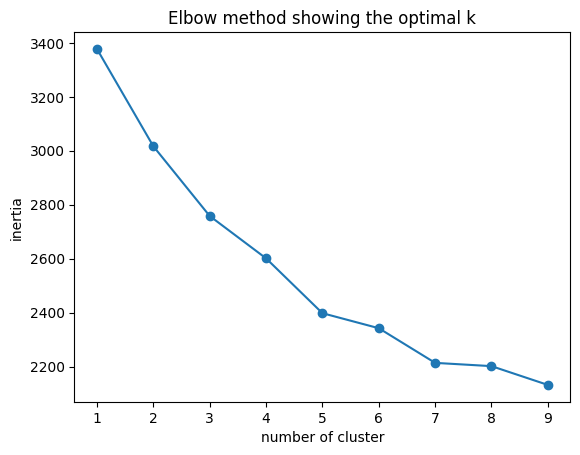

In [ ]:
# Find the number of cluster

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
k = range(1, 10)
inertia = []
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X1_scaled)
    inertia.append(km.inertia_)
plt.plot(k, inertia, '-o')
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.title('Elbow method showing the optimal k')
plt.show()


The inertia decreases slowly from 5 --> the number of cluster = 5


In [ ]:
# Train K-Means model with optimal K

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=42)

# Assign Customers into different segments

df_churn['Customer_segment'] = km.fit_predict(X1_scaled)
df_churn.head()


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Customer_segment
7,1,1,1,17,4,5,4,3,1,26,...,0,0,0,0,0,1,0,0,1,3
24,1,1,1,17,4,5,4,3,1,26,...,0,0,0,0,0,1,0,0,1,3
40,1,10,1,16,3,4,4,2,1,25,...,0,0,0,0,0,1,0,0,1,3
58,1,10,1,16,3,4,4,2,1,25,...,0,0,0,0,0,1,0,0,1,3
68,1,1,1,14,4,6,3,3,1,25,...,0,1,0,1,0,0,0,0,1,2


 ### Analyze Differences Between Segments

In [ ]:
features = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'Complain', 'DaySinceLastOrder', 'NumberOfAddress', 'OrderAmountHikeFromlastYear','SatisfactionScore','CouponUsed','OrderCount']
# Get average feature values per segment
segment_analysis = df_churn.groupby('Customer_segment')[features].mean()
print(segment_analysis)


                    Tenure  CashbackAmount  WarehouseToHome  Complain  \
Customer_segment                                                        
0                 6.044025      199.100629        18.182390  0.377358   
1                 2.968354      157.537975        17.715190  0.563291   
2                 4.622857      185.120000        19.325714  0.634286   
3                 2.676596      148.629787        15.463830  0.480851   
4                 3.945701      125.330317        15.194570  0.610860   

                  DaySinceLastOrder  NumberOfAddress  \
Customer_segment                                       
0                          4.955975         5.018868   
1                          2.974684         5.145570   
2                          4.325714         5.200000   
3                          2.753191         3.936170   
4                          2.022624         3.565611   

                  OrderAmountHikeFromlastYear  SatisfactionScore  CouponUsed  \
Customer_segmen

**1. The characteristic of each segments**

*   *Segment 1 (High-Value Inactive Users):*	Long tenure, high spending, high days since last order and low complain.
*   *Segment 2*:  low tenure, high spending, far distance, frequent order.
*   *Segment 3 (High-Value but Frequent complaints  Users)*: Long tenure, high spending, high days since last order, far distance from the warehouse, and frequent complain.
*  *Segment 4 (new commers):* new customers with low tenure, low cash back amount, low coupon used and low number of order.
*   *Segment 5 (Occasional Buyers)*: low spending (low order count and cash back amount),  Frequent complaints, low cashback received, short tenure.

**2. Promotion Strategy:**

*   Segment 1: Provide personalized recommendations & exclusive Loyalty Discount; Provide a cashback incentive for returning customers.
*   Segment 2: Free or Discounted Express Shipping, Personalized Product Recommendations & Bundles.
*   Segment 3: free or reduce delivery cost, VIP Customer Care & Priority Support, Surprise "Thank You" Gift or Loyalty Perks
*   Segment 4: Time-Limited Bonus Coupon for new customers,  Free Gift with Purchase Over Minimum Amount.
*   Segment 5: Provide exclusive trial offers and Limited-Time Flash Sale to boost the engagement, Offer customer support follow-up & service improvements.
